In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd

#查看tf 和 keras 的版本
print(tf.__version__)
print(tf.keras.__version__)

2.1.0
2.2.4-tf


In [3]:
from sklearn.datasets import fetch_california_housing
#导入加利福利亚的房价信息

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
# 切分训练集，测试集
from sklearn.model_selection import train_test_split

x_train_all ,x_test ,y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_valid_scaler = scaler.fit_transform(x_valid)
x_test_scaler = scaler.fit_transform(x_test)

In [6]:
#函数式API， 功能API
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# 符合函数， f(x) = h(g(x))
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs = [input], outputs= [output])



model.summary()
model.compile(loss="mean_squared_error", optimizer="adam")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=0.000001)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [7]:
history = model.fit(x_train_scaler, y_train,
                    validation_data = (x_valid_scaler,y_valid),
                    epochs = 100,
                    callbacks = callbacks       
                   )

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 59us/sample - loss: 1.6295 - val_loss: 0.6243
Epoch 2/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5051 - val_loss: 0.4517
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4208 - val_loss: 0.4240
Epoch 4/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3934 - val_loss: 0.4230
Epoch 5/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3782 - val_loss: 0.3958
Epoch 6/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3694 - val_loss: 0.3896
Epoch 7/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3645 - val_loss: 0.3863
Epoch 8/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3472 - val_loss: 0.3968
Epoch 9/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.342

In [8]:
print(history.history)

{'loss': [1.6294528308559553, 0.5050928108554581, 0.42078030787081067, 0.3933806001832011, 0.37823033633671577, 0.36935857812794604, 0.3645487747040419, 0.3472085177847068, 0.34279118226993505, 0.33371362113726744, 0.32812333213266476, 0.3257404940894305, 0.3254951866611543, 0.31615513388089944], 'val_loss': [0.6242747687246141, 0.45168607800197846, 0.4239868168528998, 0.4230216650306716, 0.3958143341525889, 0.38955860055540265, 0.38627917282187046, 0.396782326875423, 0.38195587273407966, 0.4046446647215875, 0.3888223320014717, 0.3948316236260017, 0.3949476799068525, 0.4383149689328147]}


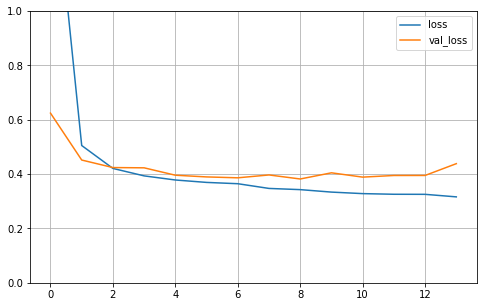

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaler, y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.4216


0.42163966681606085